In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
project = pd.read_csv('./Data/Heart Faliure.csv')
project

group      ID  outcome  age  gendera        BMI  hypertensive  \
0         1  125047      0.0   72        1  37.588179             0   
1         1  139812      0.0   75        2        NaN             0   
2         1  109787      0.0   83        2  26.572634             0   
3         1  130587      0.0   43        2  83.264629             0   
4         1  138290      0.0   75        2  31.824842             1   
...     ...     ...      ...  ...      ...        ...           ...   
1172      2  171130      0.0   62        1  25.516870             1   
1173      2  101659      0.0   78        1  25.822710             0   
1174      2  162069      0.0   85        2  23.891779             1   
1175      2  120967      0.0   79        2  35.288554             0   
1176      2  107636      0.0   47        1  23.121384             1   

      atrialfibrillation  CHD with no MI  diabetes  ...  Blood sodium  \
0                      0               0         1  ...    138.750000   
1                      0               0         0  ...    138.888889   
2                      0               0         0  ...    140.714286   
3                      0               0         0  ...    138.500000   
4                      0               0         0  ...    136.666667   
...                  ...             ...       ...  ...           ...   
1172                   1               0         1  ...    136.714286   
1173                   1               0         1  ...    135.680000   
1174                   1               0         1  ...    136.000000   
1175                   0               1         1  ...    140.000000   
1176                   0               0         1  ...    135.285714   

      Blood calcium    Chloride  Anion gap  Magnesium ion     PH  Bicarbonate  \
0          7.463636  109.166667  13.166667       2.618182  7.230    21.166667   
1          8.162500   98.444444  11.444444       1.887500  7.225    33.444444   
2          8.266667  105.857143  10.000000       2.157143  7.268    30.571429   
3          9.476923   92.071429  12.357143       1.942857  7.370    38.571429   
4          8.733333  104.500000  15.166667       1.650000  7.250    22.000000   
...             ...         ...        ...            ...    ...          ...   
1172      10.271429   94.428571  20.142857       2.714286    NaN    27.714286   
1173      10.523529  101.720000  18.160000       2.012500    NaN    20.480000   
1174       8.466667   97.285714  14.000000       2.028571    NaN    28.857143   
1175       8.183333  104.000000  15.750000       2.090000    NaN    24.375000   
1176       9.085714   93.857143  20.285714       2.566667    NaN    26.571429   

      Lactic acid  PCO2  EF  
0             0.5  40.0  55  
1             0.5  78.0  55  
2             0.5  71.5  35  
3             0.6  75.0  55  
4             0.6  50.0  55  
...           ...   ...  ..  
1172          NaN   NaN  40  
1173          NaN   NaN  30  
1174          NaN   NaN  55  
1175          NaN   NaN  25  
1176          NaN   NaN  55  

[1177 rows x 51 columns]

In [3]:
project.shape

(1177, 51)

In [4]:
project.dtypes

group                         int64
ID                            int64
outcome                     float64
age                           int64
gendera                       int64
BMI                         float64
hypertensive                  int64
atrialfibrillation            int64
CHD with no MI                int64
diabetes                      int64
deficiencyanemias             int64
depression                    int64
Hyperlipemia                  int64
Renal failure                 int64
COPD                          int64
heart rate                  float64
Systolic blood pressure     float64
Diastolic blood pressure    float64
Respiratory rate            float64
temperature                 float64
SP O2                       float64
Urine output                float64
hematocrit                  float64
RBC                         float64
MCH                         float64
MCHC                        float64
MCV                         float64
RDW                         

In [5]:
project["ID"].value_counts()

ID
125047    1
151165    1
152862    1
162107    1
157076    1
         ..
168835    1
181810    1
170840    1
110570    1
107636    1
Name: count, Length: 1177, dtype: int64

In [6]:
project.isnull().sum()

group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

In [7]:
project.duplicated().sum().sum()

0

In [8]:
project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

In [9]:
project.drop(columns=['hypertensive', 'atrialfibrillation', 'CHD with no MI', 
                    'diabetes', 'deficiencyanemias', 'depression', 'Hyperlipemia',
                    'Renal failure', 'COPD', 'temperature', 'SP O2', 'hematocrit',
                    'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Creatine kinase',
                    'Creatinine', 'Urea nitrogen', 'glucose', 'Blood sodium',
                    'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 
                    'PH', 'Bicarbonate', 'Lactic acid', 'PCO2'],axis=1, inplace=True )
project.head()

group      ID  outcome  age  gendera        BMI  heart rate  \
0      1  125047      0.0   72        1  37.588179   68.837838   
1      1  139812      0.0   75        2        NaN  101.370370   
2      1  109787      0.0   83        2  26.572634   72.318182   
3      1  130587      0.0   43        2  83.264629   94.500000   
4      1  138290      0.0   75        2  31.824842   67.920000   

   Systolic blood pressure  Diastolic blood pressure  Respiratory rate  ...  \
0               155.866667                 68.333333         16.621622  ...   
1               140.000000                 65.000000         20.851852  ...   
2               135.333333                 61.375000         23.640000  ...   
3               126.400000                 73.200000         21.857143  ...   
4               156.560000                 58.120000         21.360000  ...   

   Leucocyte  Platelets  Neutrophils  Basophils  Lymphocyte         PT  \
0   7.650000    305.100        74.65       0.40        13.3  10.600000   
1  12.740000    246.400          NaN        NaN         NaN        NaN   
2   5.480000    204.200        68.10       0.55        24.5  11.275000   
3   8.225000    216.375        81.80       0.15        14.5  27.066667   
4   8.833333    251.000          NaN        NaN         NaN        NaN   

        INR  NT-proBNP  Blood potassium  EF  
0  1.000000     1956.0         4.816667  55  
1       NaN     2384.0         4.450000  55  
2  0.950000     4081.0         5.825000  35  
3  2.666667      668.0         4.386667  55  
4       NaN    30802.0         4.783333  55  

[5 rows x 21 columns]

In [10]:
project.shape

(1177, 21)

In [11]:
project_cleaned = project.dropna(subset=['outcome'])

In [12]:
null = project.isnull().sum()
sorted_null = null.sort_values(ascending = False)

null_perc = (project.isnull().sum() / project['ID'].count()) * 100
sorted_null_perc = null_perc.sort_values(ascending = False).round(3)

null_values = pd.concat([sorted_null, sorted_null_perc], axis=1, keys = ['NULL Count', 'NULL Values %'])
null_values.head(25)

NULL Count  NULL Values %
Basophils                        259         22.005
BMI                              215         18.267
Lymphocyte                       145         12.319
Neutrophils                      144         12.234
Urine output                      36          3.059
INR                               20          1.699
PT                                20          1.699
Systolic blood pressure           16          1.359
Diastolic blood pressure          16          1.359
heart rate                        13          1.105
Respiratory rate                  13          1.105
outcome                            1          0.085
Blood potassium                    0          0.000
NT-proBNP                          0          0.000
group                              0          0.000
Platelets                          0          0.000
Leucocyte                          0          0.000
ID                                 0          0.000
gendera                            0          0.000
age                                0          0.000
EF                                 0          0.000

In [13]:
project.dropna(subset = ['ID','Urine output', 'INR', 'PT', 'Systolic blood pressure', 'Diastolic blood pressure', 'heart rate', 'Respiratory rate' ], inplace = True)

project.head()

group      ID  outcome  age  gendera        BMI  heart rate  \
0      1  125047      0.0   72        1  37.588179   68.837838   
2      1  109787      0.0   83        2  26.572634   72.318182   
3      1  130587      0.0   43        2  83.264629   94.500000   
5      1  154653      0.0   76        1  24.262293   74.181818   
6      1  194420      0.0   72        1  39.667426   69.636364   

   Systolic blood pressure  Diastolic blood pressure  Respiratory rate  ...  \
0               155.866667                 68.333333         16.621622  ...   
2               135.333333                 61.375000         23.640000  ...   
3               126.400000                 73.200000         21.857143  ...   
5               118.100000                 52.950000         20.545455  ...   
6               106.565217                 47.826087         19.148148  ...   

   Leucocyte  Platelets  Neutrophils  Basophils  Lymphocyte         PT  \
0   7.650000    305.100        74.65       0.40       13.30  10.600000   
2   5.480000    204.200        68.10       0.55       24.50  11.275000   
3   8.225000    216.375        81.80       0.15       14.50  27.066667   
5   9.516667    273.000        85.40       0.30        9.30  18.783333   
6   7.975000    140.250        80.70       0.20       13.45  14.000000   

        INR  NT-proBNP  Blood potassium  EF  
0  1.000000     1956.0         4.816667  55  
2  0.950000     4081.0         5.825000  35  
3  2.666667      668.0         4.386667  55  
5  1.700000    34183.0         4.075000  35  
6  1.200000    29683.0         4.606667  55  

[5 rows x 21 columns]

In [14]:
null = project.isnull().sum()
sorted_null = null.sort_values(ascending = False)

null_perc = (project.isnull().sum() / project['ID'].count()) * 100
sorted_null_perc = null_perc.sort_values(ascending = False).round(3)

null_values = pd.concat([sorted_null, sorted_null_perc], axis=1, keys = ['NULL Count', 'NULL Values %'])
null_values.head(25)

NULL Count  NULL Values %
Basophils                        245         21.895
BMI                              201         17.962
Lymphocyte                       134         11.975
Neutrophils                      133         11.886
group                              0          0.000
Leucocyte                          0          0.000
Blood potassium                    0          0.000
NT-proBNP                          0          0.000
INR                                0          0.000
PT                                 0          0.000
Platelets                          0          0.000
Urine output                       0          0.000
ID                                 0          0.000
Respiratory rate                   0          0.000
Diastolic blood pressure           0          0.000
Systolic blood pressure            0          0.000
heart rate                         0          0.000
gendera                            0          0.000
age                                0          0.000
outcome                            0          0.000
EF                                 0          0.000

In [15]:
project.shape

(1119, 21)

In [16]:

from sklearn.impute import SimpleImputer

In [17]:
project['Basophils'] = SimpleImputer(strategy = 'median').fit_transform(project[['Basophils']])

project['BMI'] = SimpleImputer(strategy = 'median').fit_transform(project[['BMI']])

project['Lymphocyte'] = SimpleImputer(strategy = 'median').fit_transform(project[['Lymphocyte']])

project['Neutrophils'] = SimpleImputer(strategy = 'median').fit_transform(project[['Neutrophils']])

In [18]:
null = project.isnull().sum()
sorted_null = null.sort_values(ascending = False)

null_perc = (project.isnull().sum() / project['ID'].count()) * 100
sorted_null_perc = null_perc.sort_values(ascending = False).round(3)

null_values = pd.concat([sorted_null, sorted_null_perc], axis=1, keys = ['NULL Count', 'NULL Values %'])
null_values.head(25)

NULL Count  NULL Values %
group                              0            0.0
Leucocyte                          0            0.0
Blood potassium                    0            0.0
NT-proBNP                          0            0.0
INR                                0            0.0
PT                                 0            0.0
Lymphocyte                         0            0.0
Basophils                          0            0.0
Neutrophils                        0            0.0
Platelets                          0            0.0
Urine output                       0            0.0
ID                                 0            0.0
Respiratory rate                   0            0.0
Diastolic blood pressure           0            0.0
Systolic blood pressure            0            0.0
heart rate                         0            0.0
BMI                                0            0.0
gendera                            0            0.0
age                                0            0.0
outcome                            0            0.0
EF                                 0            0.0

In [19]:
project.rename(columns = {"gendera" : "gender",
                         "CHD with no MI" : "CHD_with_no_MI",
                         "Blood potassium" : "Blood_potassium",
                         "Urine output" : "Urine_output",
                         "Respiratory rate" : "Respiratory_rate",
                         "Diastolic blood pressure" : "Diastolic_blood_pressure",
                         "Systolic blood pressure" : "Systolic_blood_pressure",
                          "NT-proBNP": "NT_proBNP",
                         "heart rate" : "heart_rate",
                         },inplace = True)
project.head()

group      ID  outcome  age  gender        BMI  heart_rate  \
0      1  125047      0.0   72       1  37.588179   68.837838   
2      1  109787      0.0   83       2  26.572634   72.318182   
3      1  130587      0.0   43       2  83.264629   94.500000   
5      1  154653      0.0   76       1  24.262293   74.181818   
6      1  194420      0.0   72       1  39.667426   69.636364   

   Systolic_blood_pressure  Diastolic_blood_pressure  Respiratory_rate  ...  \
0               155.866667                 68.333333         16.621622  ...   
2               135.333333                 61.375000         23.640000  ...   
3               126.400000                 73.200000         21.857143  ...   
5               118.100000                 52.950000         20.545455  ...   
6               106.565217                 47.826087         19.148148  ...   

   Leucocyte  Platelets  Neutrophils  Basophils  Lymphocyte         PT  \
0   7.650000    305.100        74.65       0.40       13.30  10.600000   
2   5.480000    204.200        68.10       0.55       24.50  11.275000   
3   8.225000    216.375        81.80       0.15       14.50  27.066667   
5   9.516667    273.000        85.40       0.30        9.30  18.783333   
6   7.975000    140.250        80.70       0.20       13.45  14.000000   

        INR  NT_proBNP  Blood_potassium  EF  
0  1.000000     1956.0         4.816667  55  
2  0.950000     4081.0         5.825000  35  
3  2.666667      668.0         4.386667  55  
5  1.700000    34183.0         4.075000  35  
6  1.200000    29683.0         4.606667  55  

[5 rows x 21 columns]

In [20]:
project.shape

(1119, 21)

In [21]:
project.isnull().sum()

group                       0
ID                          0
outcome                     0
age                         0
gender                      0
BMI                         0
heart_rate                  0
Systolic_blood_pressure     0
Diastolic_blood_pressure    0
Respiratory_rate            0
Urine_output                0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Basophils                   0
Lymphocyte                  0
PT                          0
INR                         0
NT_proBNP                   0
Blood_potassium             0
EF                          0
dtype: int64

In [22]:
project.columns

Index(['group', 'ID', 'outcome', 'age', 'gender', 'BMI', 'heart_rate',
       'Systolic_blood_pressure', 'Diastolic_blood_pressure',
       'Respiratory_rate', 'Urine_output', 'Leucocyte', 'Platelets',
       'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR', 'NT_proBNP',
       'Blood_potassium', 'EF'],
      dtype='object')

In [23]:
X=project.iloc[:,:7]
y=project['outcome']
X

group      ID  outcome  age  gender        BMI  heart_rate
0         1  125047      0.0   72       1  37.588179   68.837838
2         1  109787      0.0   83       2  26.572634   72.318182
3         1  130587      0.0   43       2  83.264629   94.500000
5         1  154653      0.0   76       1  24.262293   74.181818
6         1  194420      0.0   72       1  39.667426   69.636364
...     ...     ...      ...  ...     ...        ...         ...
1166      2  174899      0.0   78       1  23.296976   91.700000
1169      2  198933      0.0   88       2  26.571482  110.166667
1170      2  187991      0.0   79       1  24.221453  110.478261
1174      2  162069      0.0   85       2  23.891779   52.720000
1175      2  120967      0.0   79       2  35.288554   93.400000

[1119 rows x 7 columns]

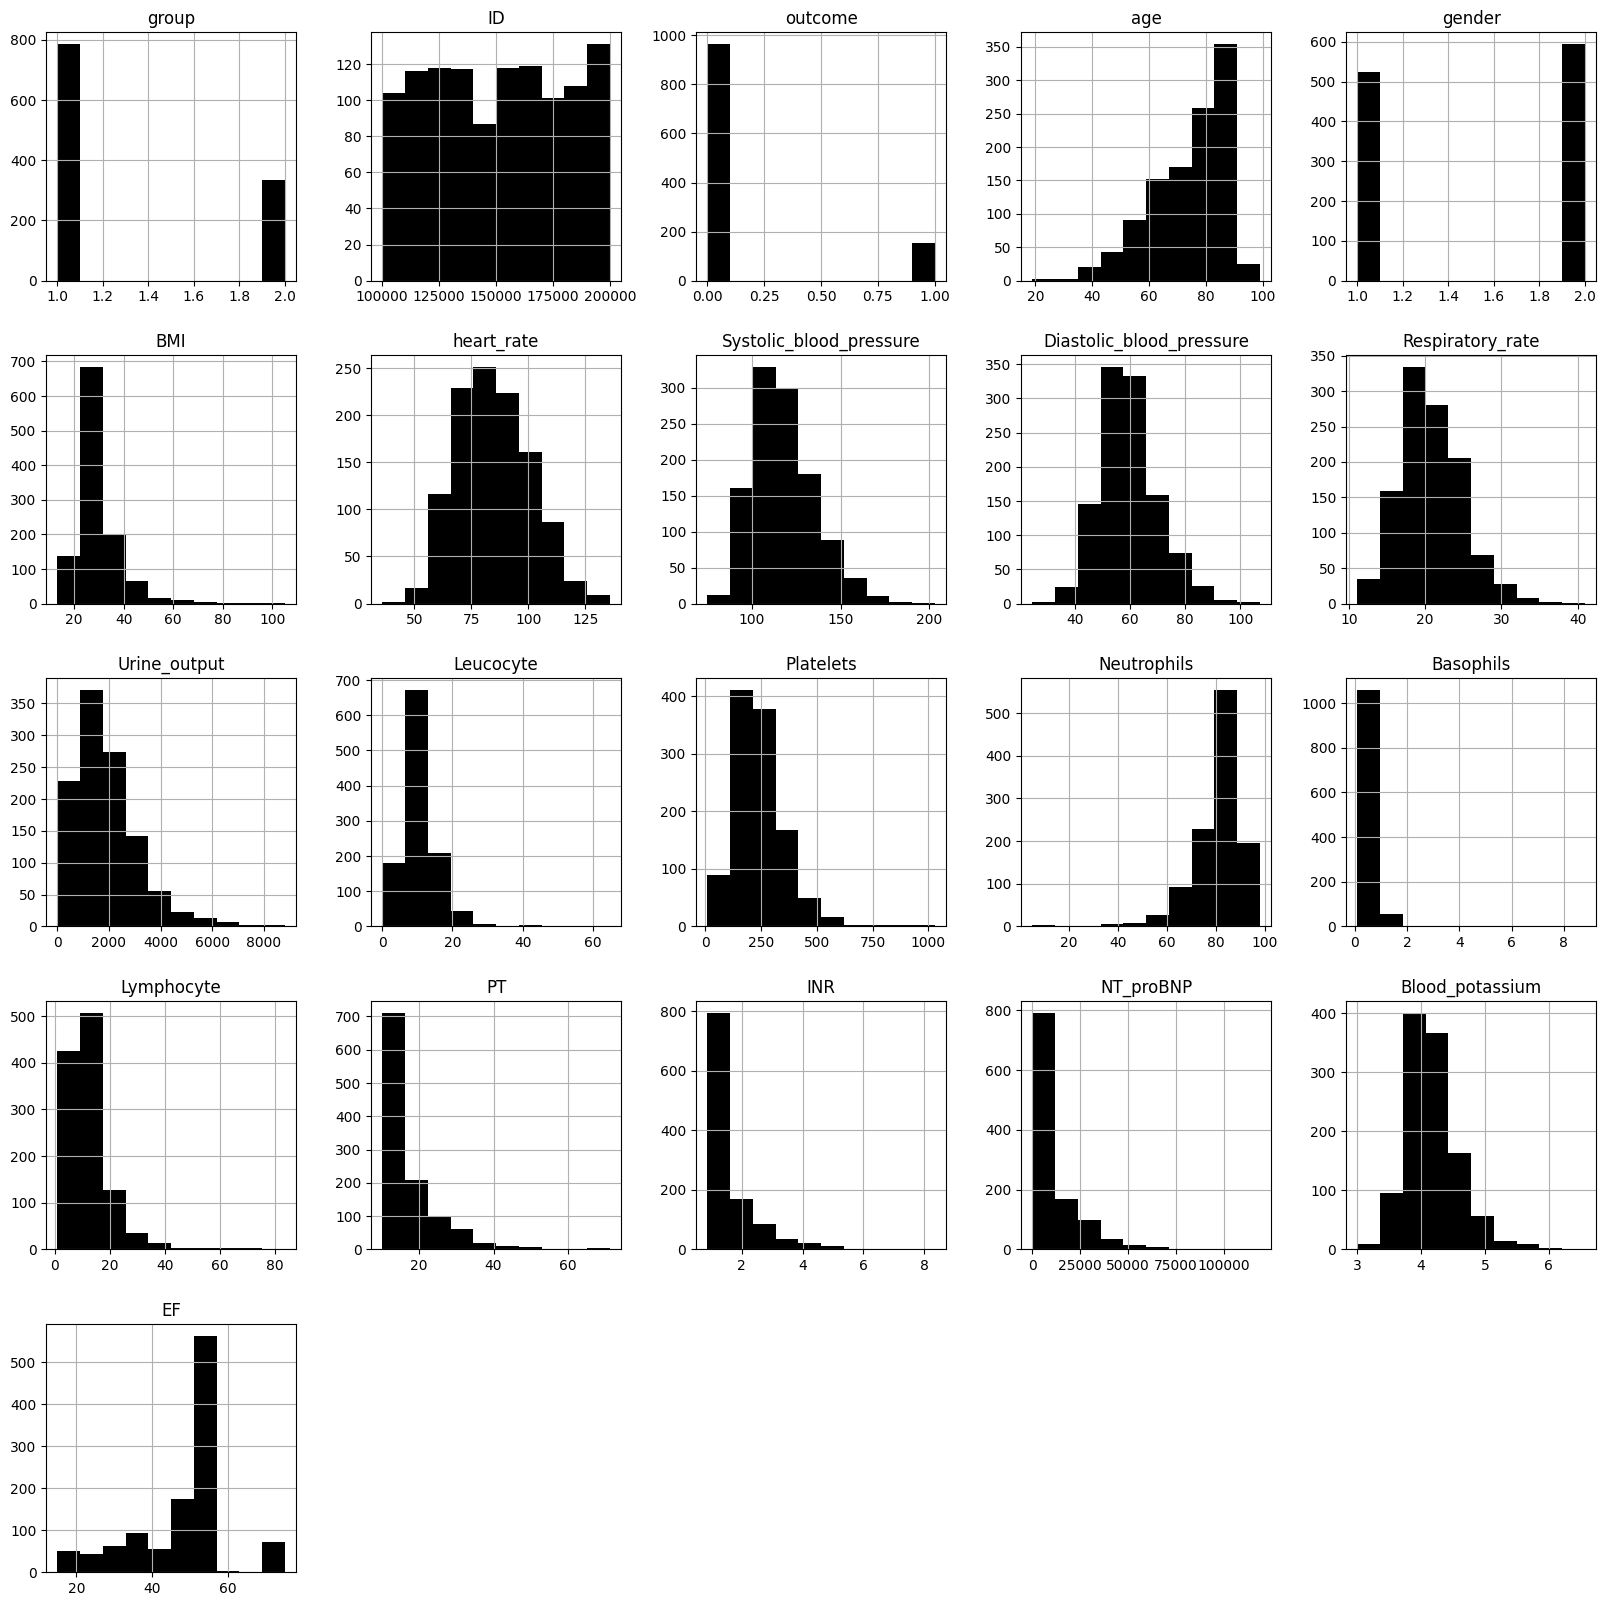

In [24]:
project.hist(figsize=(20,20),histtype='barstacked',color='k')
plt.show()

In [25]:
# Calculate summary statistics for numerical columns by outcome group
overall_stats = project.groupby('outcome').describe()

# Calculate the proportion of live (1) and dead (0) cases
outcome_counts = project['outcome'].value_counts(normalize=True)


In [26]:
print(overall_stats)

print(outcome_counts)

         group                                                  ID  \
         count      mean       std  min  25%  50%  75%  max  count   
outcome                                                              
0.0      964.0  1.301867  0.459306  1.0  1.0  1.0  2.0  2.0  964.0   
1.0      155.0  1.270968  0.445900  1.0  1.0  1.0  2.0  2.0  155.0   

                        ... Blood_potassium               EF             \
                  mean  ...             75%       max  count       mean   
outcome                 ...                                               
0.0      150145.442946  ...        4.355952  5.825000  964.0  48.810166   
1.0      153793.729032  ...        4.570833  6.566667  155.0  48.193548   

                                                  
               std   min   25%   50%   75%   max  
outcome                                           
0.0      12.627101  15.0  40.0  55.0  55.0  75.0  
1.0      14.791669  15.0  35.0  55.0  55.0  75.0  

[2 rows x 160 col

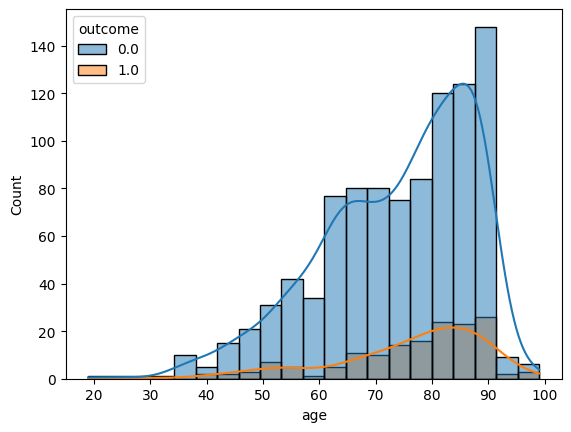

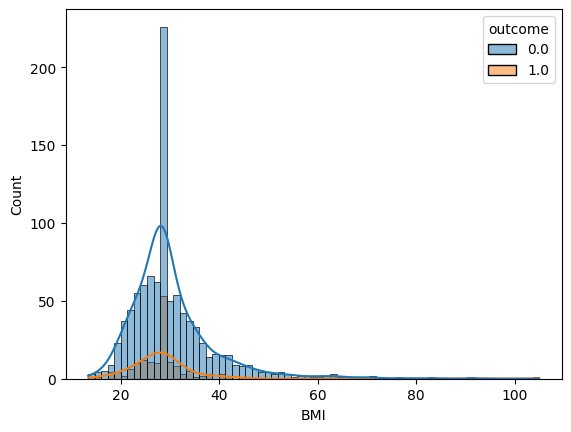

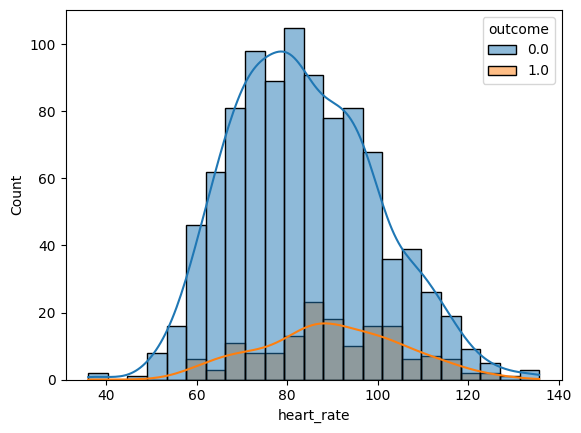

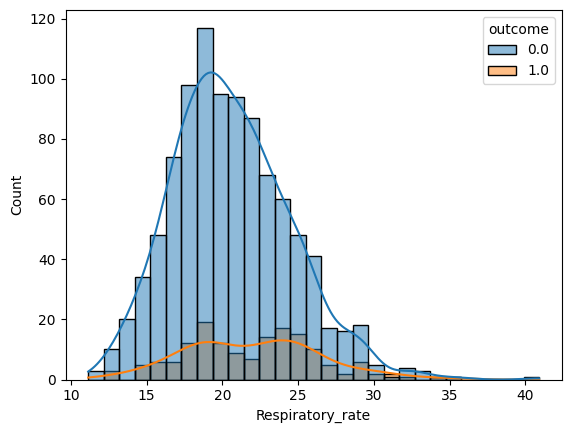

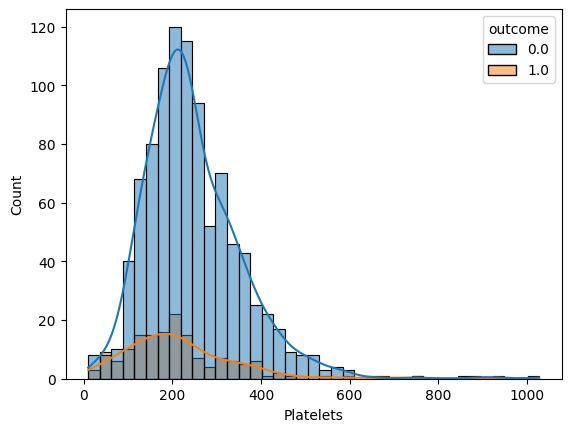

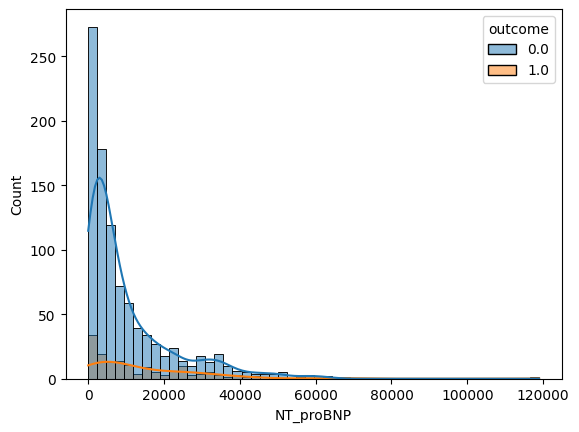

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=project, x='age', hue='outcome', kde=True)
plt.show()
sns.histplot(data=project, x='BMI', hue='outcome', kde=True)
plt.show()
sns.histplot(data=project, x='heart_rate', hue='outcome', kde=True)
plt.show()
sns.histplot(data=project, x='Respiratory_rate', hue='outcome', kde=True)
plt.show()
sns.histplot(data=project, x='Platelets', hue='outcome', kde=True)
plt.show()
sns.histplot(data=project, x='NT_proBNP', hue='outcome', kde=True)
plt.show()

In [28]:
correlation=project.corr().round(2)
correlation

group    ID  outcome   age  gender   BMI  \
group                      1.00  0.00    -0.02 -0.01    0.02 -0.03   
ID                         0.00  1.00     0.04 -0.03   -0.04  0.04   
outcome                   -0.02  0.04     1.00  0.06   -0.02 -0.06   
age                       -0.01 -0.03     0.06  1.00    0.08 -0.37   
gender                     0.02 -0.04    -0.02  0.08    1.00  0.01   
BMI                       -0.03  0.04    -0.06 -0.37    0.01  1.00   
heart_rate                 0.01  0.03     0.13 -0.21   -0.01 -0.02   
Systolic_blood_pressure   -0.07  0.04    -0.13 -0.03    0.08  0.09   
Diastolic_blood_pressure  -0.01  0.05    -0.09 -0.35   -0.13  0.14   
Respiratory_rate           0.00 -0.02     0.12 -0.04   -0.05 -0.04   
Urine_output              -0.00  0.03    -0.17 -0.24   -0.14  0.26   
Leucocyte                 -0.00 -0.01     0.21  0.01   -0.01 -0.06   
Platelets                  0.00 -0.01    -0.09 -0.03    0.10 -0.05   
Neutrophils                0.02  0.00     0.06  0.13    0.02 -0.09   
Basophils                 -0.04 -0.02    -0.02 -0.08   -0.03  0.04   
Lymphocyte                 0.00 -0.01    -0.13 -0.12    0.03  0.08   
PT                         0.02 -0.01     0.13  0.09   -0.08  0.00   
INR                        0.02 -0.01     0.14  0.10   -0.08  0.00   
NT_proBNP                 -0.03  0.02     0.13  0.07    0.03 -0.17   
Blood_potassium           -0.00  0.02     0.14 -0.06   -0.05  0.05   
EF                        -0.01  0.02    -0.02  0.06    0.18  0.06   

                          heart_rate  Systolic_blood_pressure  \
group                           0.01                    -0.07   
ID                              0.03                     0.04   
outcome                         0.13                    -0.13   
age                            -0.21                    -0.03   
gender                         -0.01                     0.08   
BMI                            -0.02                     0.09   
heart_rate                      1.00                    -0.15   
Systolic_blood_pressure        -0.15                     1.00   
Diastolic_blood_pressure        0.32                     0.38   
Respiratory_rate                0.37                    -0.08   
Urine_output                    0.03                     0.21   
Leucocyte                       0.14                    -0.08   
Platelets                       0.09                     0.09   
Neutrophils                     0.01                    -0.01   
Basophils                       0.01                     0.02   
Lymphocyte                     -0.05                     0.06   
PT                             -0.04                    -0.18   
INR                            -0.04                    -0.17   
NT_proBNP                       0.01                    -0.07   
Blood_potassium                -0.02                    -0.02   
EF                             -0.09                     0.23   

                          Diastolic_blood_pressure  Respiratory_rate  ...  \
group                                        -0.01              0.00  ...   
ID                                            0.05             -0.02  ...   
outcome                                      -0.09              0.12  ...   
age                                          -0.35             -0.04  ...   
gender                                       -0.13             -0.05  ...   
BMI                                           0.14             -0.04  ...   
heart_rate                                    0.32              0.37  ...   
Systolic_blood_pressure                       0.38             -0.08  ...   
Diastolic_blood_pressure                      1.00              0.10  ...   
Respiratory_rate                              0.10              1.00  ...   
Urine_output                                  0.22              0.07  ...   
Leucocyte                                    -0.06              0.17  ...   
Platelets                                     0.06   

In [29]:
import seaborn as sns

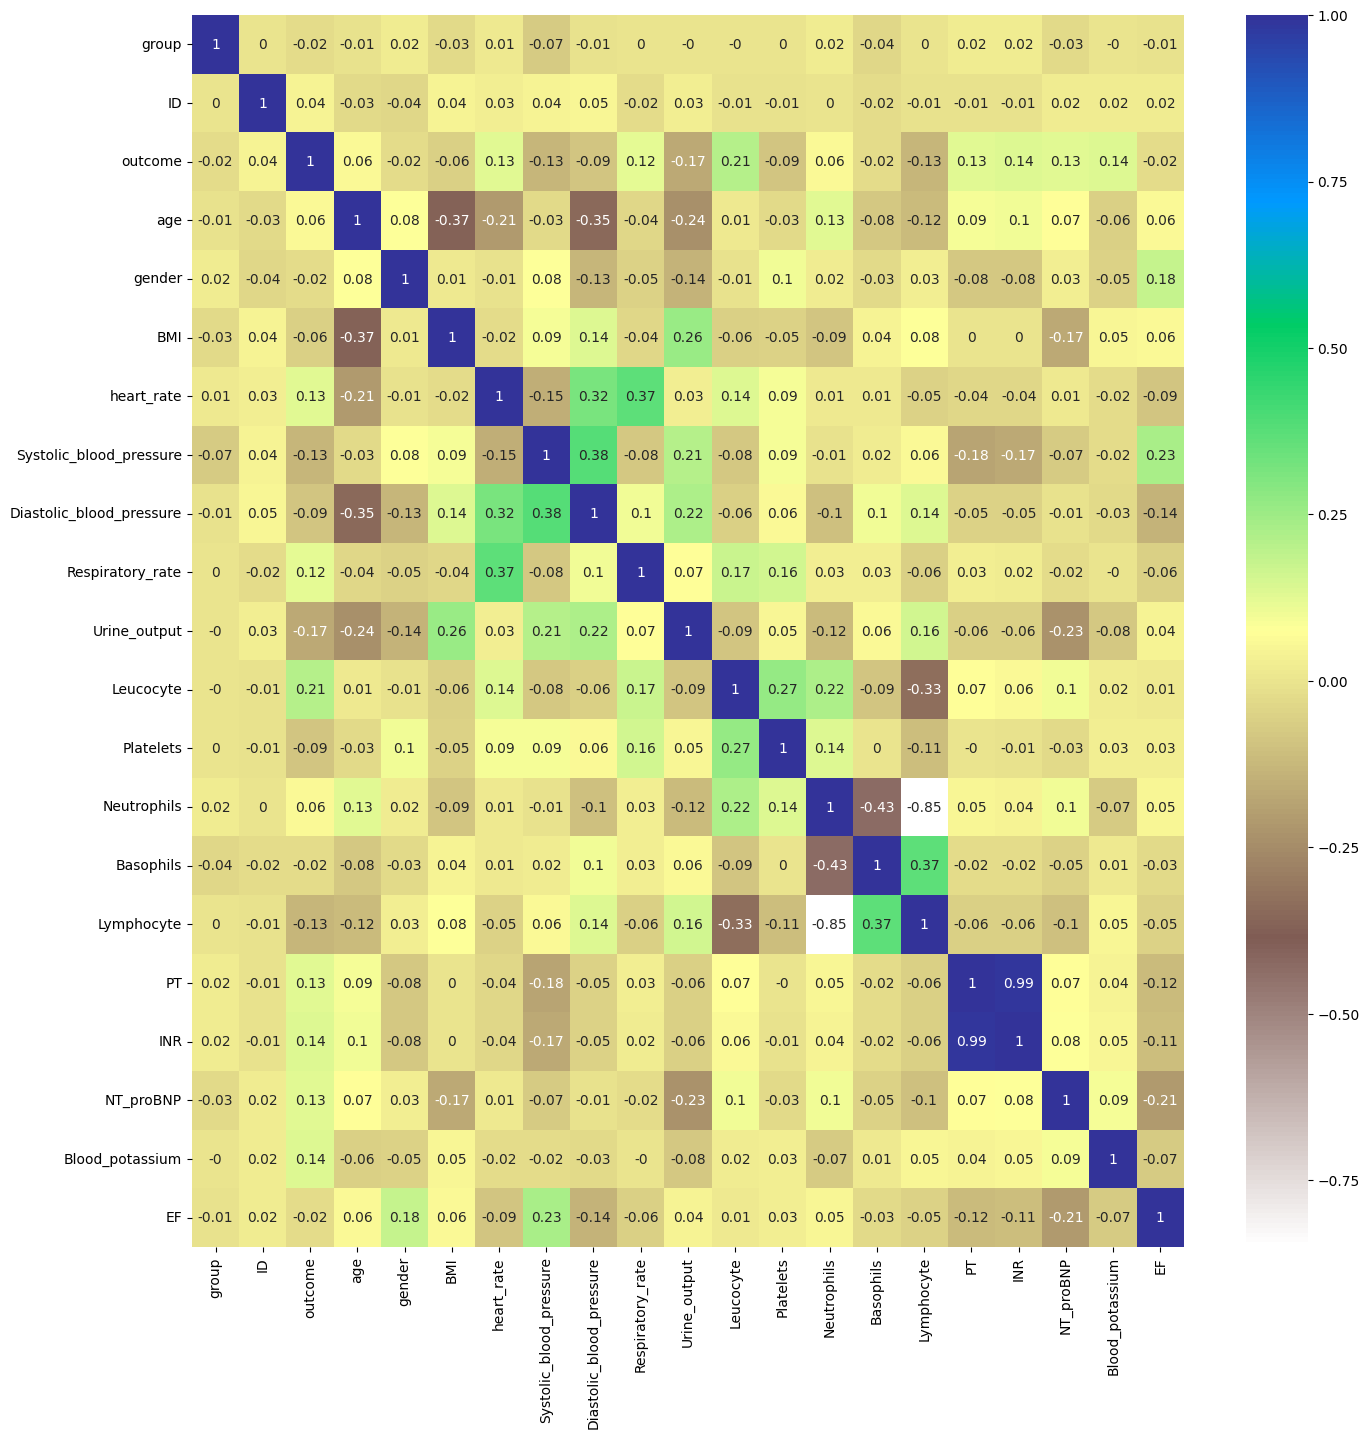

In [30]:
plt.figure(figsize = (16,16))
sns.heatmap(data=correlation,cmap='terrain_r',annot=True)
plt.show()

In [31]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

res=smf.ols(formula='project.outcome ~ age+gender+BMI+heart_rate+Systolic_blood_pressure+Diastolic_blood_pressure+Respiratory_rate+Urine_output+Leucocyte+Platelets+Neutrophils+Basophils+Lymphocyte+PT+INR+NT_proBNP+Blood_potassium+EF', data=project).fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:        project.outcome   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     10.85
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           6.04e-29
Time:                        19:28:45   Log-Likelihood:                -306.96
No. Observations:                1119   AIC:                             651.9
Df Residuals:                    1100   BIC:                             747.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [32]:
import plotly.express as px
%matplotlib inline
import matplotlib

sns. set_style ('darkgrid')
matplotlib.rcParams[ 'font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (5, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [33]:
px.histogram(project, x='BMI', title= 'BMI Vs Outcome', color='outcome')



In [34]:
px.histogram(project, x='age', title= 'Age Vs Outcome', color='outcome')

In [35]:
project.head()

group      ID  outcome  age  gender        BMI  heart_rate  \
0      1  125047      0.0   72       1  37.588179   68.837838   
2      1  109787      0.0   83       2  26.572634   72.318182   
3      1  130587      0.0   43       2  83.264629   94.500000   
5      1  154653      0.0   76       1  24.262293   74.181818   
6      1  194420      0.0   72       1  39.667426   69.636364   

   Systolic_blood_pressure  Diastolic_blood_pressure  Respiratory_rate  ...  \
0               155.866667                 68.333333         16.621622  ...   
2               135.333333                 61.375000         23.640000  ...   
3               126.400000                 73.200000         21.857143  ...   
5               118.100000                 52.950000         20.545455  ...   
6               106.565217                 47.826087         19.148148  ...   

   Leucocyte  Platelets  Neutrophils  Basophils  Lymphocyte         PT  \
0   7.650000    305.100        74.65       0.40       13.30  10.600000   
2   5.480000    204.200        68.10       0.55       24.50  11.275000   
3   8.225000    216.375        81.80       0.15       14.50  27.066667   
5   9.516667    273.000        85.40       0.30        9.30  18.783333   
6   7.975000    140.250        80.70       0.20       13.45  14.000000   

        INR  NT_proBNP  Blood_potassium  EF  
0  1.000000     1956.0         4.816667  55  
2  0.950000     4081.0         5.825000  35  
3  2.666667      668.0         4.386667  55  
5  1.700000    34183.0         4.075000  35  
6  1.200000    29683.0         4.606667  55  

[5 rows x 21 columns]

In [36]:
px.histogram(project, x='gender', title= 'BMI Vs Outcome', color='outcome')

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [38]:
X= project[['heart_rate','Respiratory_rate', 'Urine_output', 'Leucocyte', 'Platelets',
             'NT_proBNP','Blood_potassium',]]

Y= project[['outcome']]

x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2, random_state=786)


In [39]:
model_Lg = LogisticRegression()
model_Lg.fit(x_train,y_train)
y_pred = model_Lg.predict(x_test)
cmlg=metrics.confusion_matrix(y_test, y_pred)
x = metrics.accuracy_score(y_test, y_pred)

Lgmodel_train_accuracy = model_Lg.score(x_train,y_train)
print("Train accuracy LR = ",model_Lg.score(x_train,y_train)*100)
Lgmodel_test_accuracy = model_Lg.score(x_test,y_test)
print("Test accuracy LR = ",model_Lg.score(x_test,y_test)*100)
Lg_cvscore = cross_val_score(model_Lg,X,Y,cv=10).mean()
print('Cross validation score:',Lg_cvscore*100)

Train accuracy LR =  85.47486033519553
Test accuracy LR =  88.83928571428571
Cross validation score: 85.61293436293435


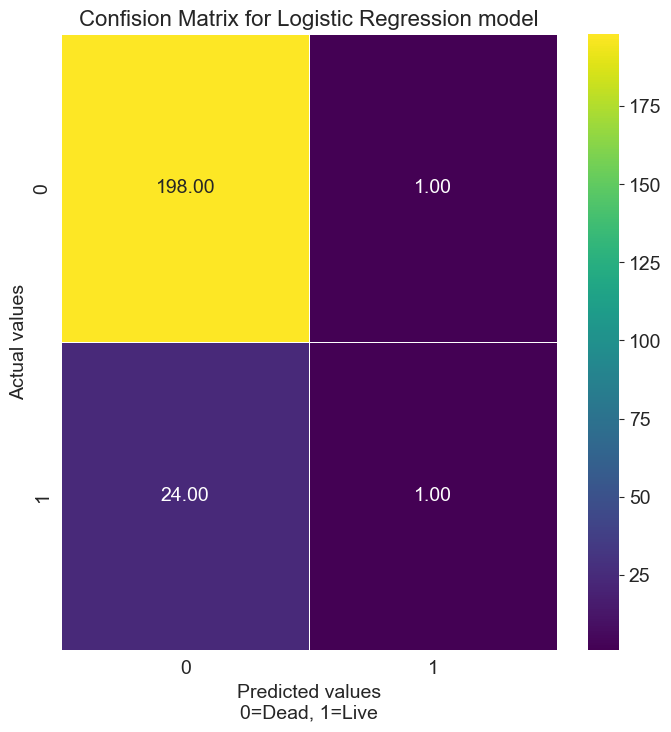

In [40]:
lg_cm = confusion_matrix(y_test,y_pred)
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cmlg, annot=True, linewidth=0.7, fmt=".2f",  cmap='viridis')
plt.title('Confision Matrix for Logistic Regression model', size=16)
plt.xlabel('Predicted values\n0=Dead, 1=Live', size=14)
plt.ylabel('Actual values', size=14)
plt.show()

In [41]:
print('\n\n', metrics.classification_report(y_test, y_pred))



               precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       199
         1.0       0.50      0.04      0.07        25

    accuracy                           0.89       224
   macro avg       0.70      0.52      0.51       224
weighted avg       0.85      0.89      0.84       224



In [42]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=2,  algorithm = 'auto')
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [43]:
y_pred = knn_model.predict(x_test)
x = metrics.accuracy_score(y_test, y_pred)

print("KNN Accuracy = ", x*100)
print('\n\n', metrics.classification_report(y_test, y_pred))
KNN_CVscore = cross_val_score(knn_model,X,Y,cv=10).mean()
print('Cross validation score: ',KNN_CVscore)

KNN Accuracy =  89.73214285714286


               precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       199
         1.0       0.67      0.16      0.26        25

    accuracy                           0.90       224
   macro avg       0.79      0.57      0.60       224
weighted avg       0.88      0.90      0.87       224

Cross validation score:  0.8597007722007721


In [44]:
knn_train_accuracy = knn_model.score(x_train,y_train)
print('knn_modeltrain_accuracy is = ',knn_model.score(x_train,y_train)*100)
knn_test_accuracy = knn_model.score(x_test,y_test)
print('knn_modeltest_accuracy is = ',knn_model.score(x_test,y_test)*100)

knn_modeltrain_accuracy is =  88.15642458100558
knn_modeltest_accuracy is =  89.73214285714286


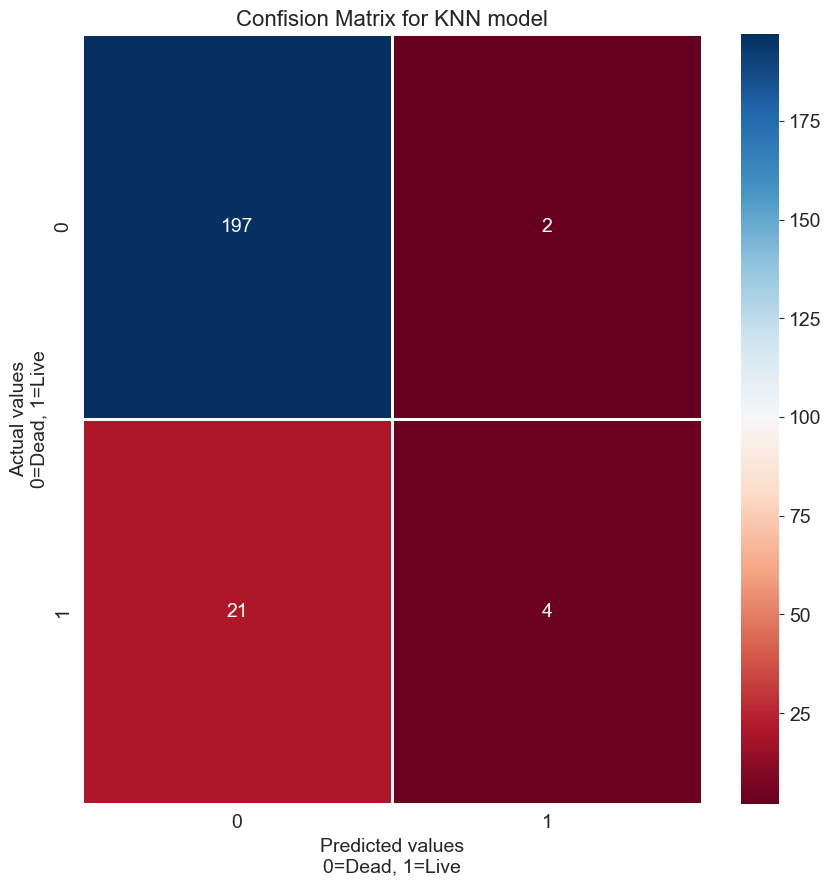

In [45]:
Knn_CM = confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(Knn_CM, annot=True, linewidth=1.0, fmt=".0f",cmap='RdBu')
plt.title('Confision Matrix for KNN model', size=16)
plt.xlabel('Predicted values\n0=Dead, 1=Live', size=14)
plt.ylabel('Actual values\n0=Dead, 1=Live', size=14)
plt.show()

In [46]:
# SVM
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf')
y_pred = svm_model.fit(x_train, y_train).predict(x_test)
x = metrics.accuracy_score(y_test, y_pred)
print("Accuracy for SVM model", x*100)
print(metrics.classification_report(y_test,y_pred))

Accuracy for SVM model 88.83928571428571
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       199
         1.0       0.00      0.00      0.00        25

    accuracy                           0.89       224
   macro avg       0.44      0.50      0.47       224
weighted avg       0.79      0.89      0.84       224



In [47]:
svm_train_accuracy = svm_model.score(x_train,y_train)
print("Training accuracy for SVM model= ",svm_model.score(x_train,y_train)*100)
svm_test_accuracy= svm_model.score(x_test,y_test)
print("Testing accuracy for SVM model",svm_model.score(x_test,y_test)*100)
svm_cvscore = cross_val_score(svm_model,X,Y,cv=10).mean()
print('Cross validation score for SVM model:',svm_cvscore*100)

Training accuracy for SVM model=  85.47486033519553
Testing accuracy for SVM model 88.83928571428571
Cross validation score for SVM model: 86.14864864864863


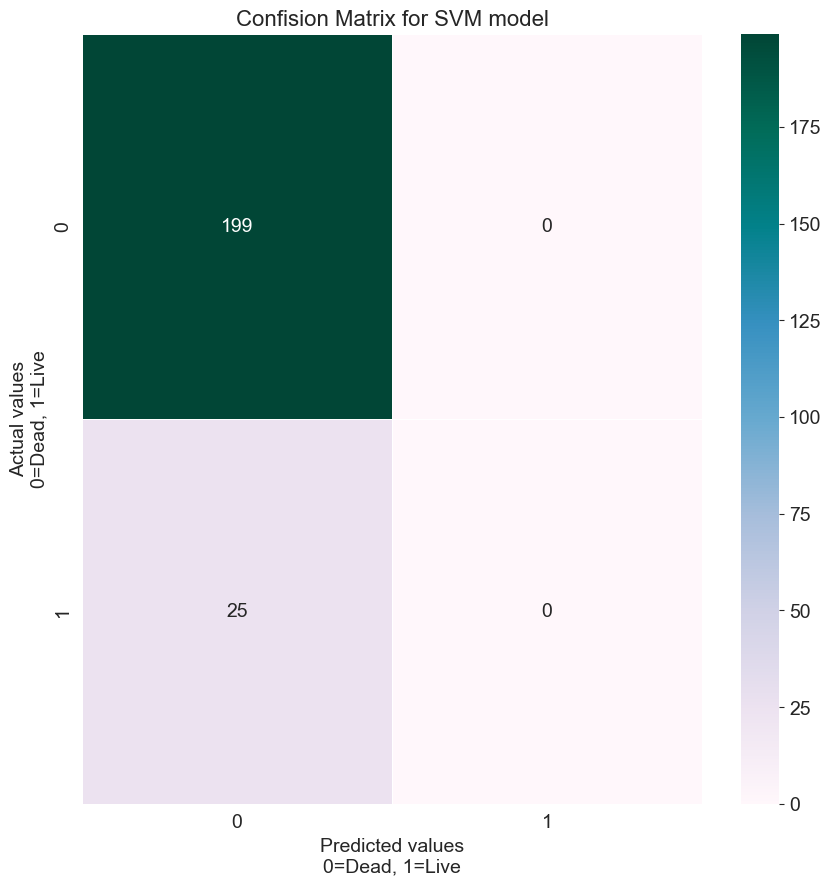

In [48]:
SVM_cm = confusion_matrix(y_test,y_pred)
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(SVM_cm, annot=True, linewidth=0.5, fmt=".0f",  cmap='PuBuGn')
plt.title('Confision Matrix for SVM model', size=16)
plt.xlabel('Predicted values\n0=Dead, 1=Live', size=14)
plt.ylabel('Actual values\n0=Dead, 1=Live', size=14)
plt.show()

In [49]:
# Decision tree model

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [50]:
X= project[['heart_rate','Respiratory_rate', 'Urine_output', 'Leucocyte', 'Platelets',
             'NT_proBNP','Blood_potassium',]]

Y= project[['outcome']]

x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2, random_state= 786)

In [51]:
from sklearn.tree import DecisionTreeClassifier

dtc_model= DecisionTreeClassifier(criterion= 'entropy', random_state= 786, max_depth= 2)
dtc_model.fit(x_train, y_train)
y_predict= dtc_model.predict(x_test)
acc= metrics.accuracy_score(y_test, y_predict)
print("Accuracy of Decision tree model = ", acc*100)
print(metrics.classification_report(y_test, y_predict))

Accuracy of Decision tree model =  88.83928571428571
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       199
         1.0       0.00      0.00      0.00        25

    accuracy                           0.89       224
   macro avg       0.44      0.50      0.47       224
weighted avg       0.79      0.89      0.84       224



In [52]:
dtc_cvs= cross_val_score(dtc_model, X, Y, cv=786).mean()
print("Cross validation score= ", dtc_cvs)

dtc_train_accuracy= dtc_model.score(x_train, y_train)
print("Training Accuracy for Decision Tree model= ", dtc_train_accuracy)

dtc_test_accuracy= dtc_model.score(x_test, y_test)
print("Testing Accuracy for Decision Tree model= ", dtc_test_accuracy)

Cross validation score=  0.9013994910941476
Training Accuracy for Decision Tree model=  0.8547486033519553
Testing Accuracy for Decision Tree model=  0.8883928571428571


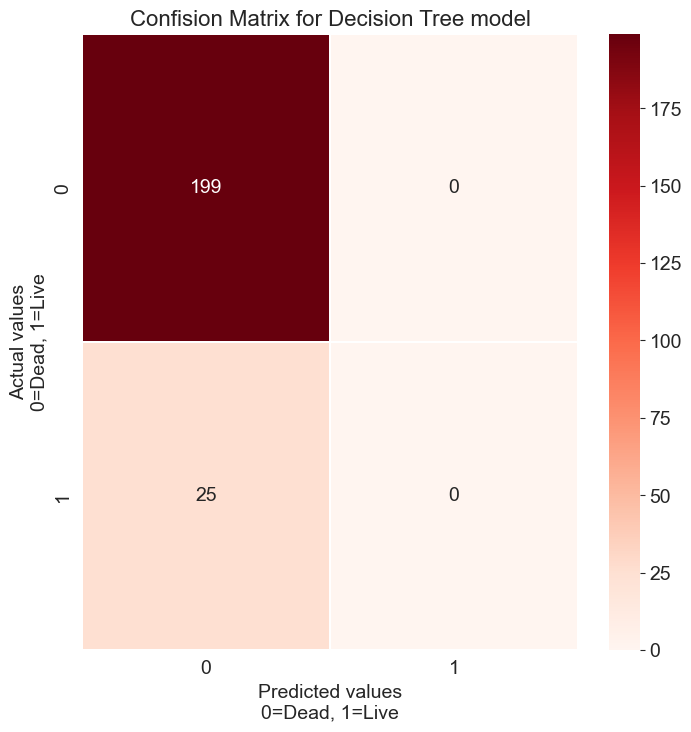

In [53]:
dtc_conmat= confusion_matrix(y_test, y_predict)
f, ax= plt.subplots(figsize=(8, 8))
sns.heatmap(dtc_conmat, annot= True, linewidth= 0.01, fmt= 'g', cmap= 'Reds', ax= ax)
plt.title('Confision Matrix for Decision Tree model', size=16)
plt.xlabel('Predicted values\n0=Dead, 1=Live', size=14)
plt.ylabel('Actual values\n0=Dead, 1=Live', size=14)
plt.show()

In [54]:
# Random forest model

from sklearn.ensemble import RandomForestClassifier

rfc_model= RandomForestClassifier(n_estimators= 15, random_state= 786)
rfc_model.fit(x_train, y_train)
y_predict= rfc_model.predict(x_test)

acc= metrics.accuracy_score(y_test, y_predict)
print("Accuracy of Random forest model= ", acc*100)
print(metrics.classification_report(y_test, y_predict))

Accuracy of Random forest model=  87.05357142857143
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       199
         1.0       0.25      0.08      0.12        25

    accuracy                           0.87       224
   macro avg       0.57      0.52      0.53       224
weighted avg       0.82      0.87      0.84       224



In [63]:
cvs= cross_val_score(rfc_model, X, Y, cv=15).mean()
print("Cross validation score= ", cvs)

train_accuracy= rfc_model.score(x_train, y_train)
print("Training Accuracy for Random forest model= ", train_accuracy)

test_accuracy= rfc_model.score(x_test, y_test)
print("Testing Accuracy for Random forest model= ", test_accuracy)

Cross validation score=  0.8650930930930929
Training Accuracy for Random forest model=  0.9955307262569832
Testing Accuracy for Random forest model=  0.8705357142857143


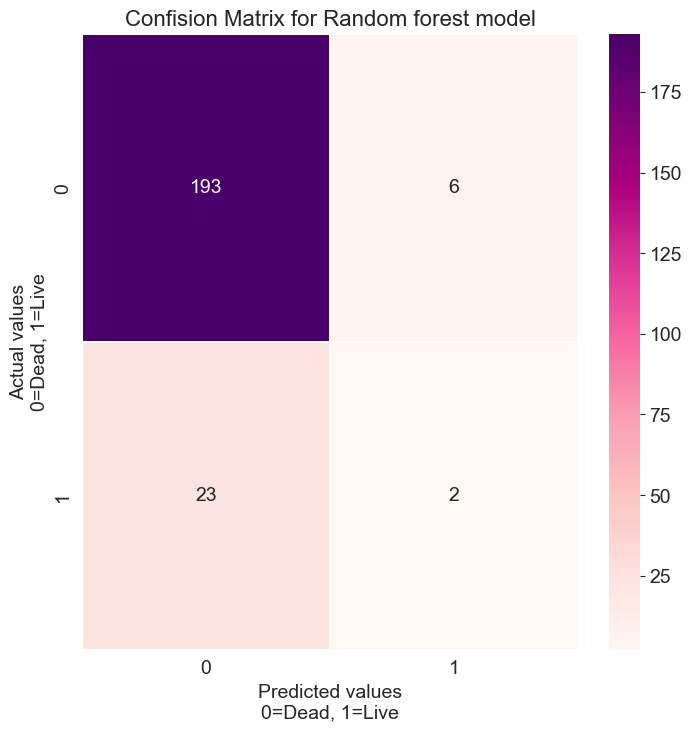

In [56]:
rfc_conmat= confusion_matrix(y_test, y_predict)
f, ax= plt.subplots(figsize=(8, 8))
sns.heatmap(rfc_conmat, annot= True, linewidth= 0.1, fmt= '.0f', cmap= 'RdPu', ax= ax)
plt.title('Confision Matrix for Random forest model', size=16)
plt.xlabel('Predicted values\n0=Dead, 1=Live', size=14)
plt.ylabel('Actual values\n0=Dead, 1=Live', size=14)
plt.show()

In [67]:
datatrain=[knn_train_accuracy,dtc_train_accuracy,rfc_train_accuracy,nb_train_accuracy,
           XB_train_accuracy,svc_lin_train_accuracy,svc_lin_train_accuracy]
datatest=[knn_test_accuracy,dtc_test_accuracy,rfc_test_accuracy,nb_test_accuracy,
          XB_test_accuracy,svc_lin_test_accuracy,svc_rbf_test_accuracy,svc_poly_test_accuracy]
trainingtesting=pd.DataFrame.from_dict({'Cross Validation Score of':['KNN', 'Decision Tree','Random Forest','Naive Bayes',
                                      'XG Boost', 'SVM_linear','SVM_rbf','SVM_poly'],
                              'Training Accuracies': datatrain,'Testing Accuracies':datatest})
trainingtesting

NameError: name 'XB_train_accuracy' is not defined

In [66]:
import plotly.express as px
import plotly.graph_objs as go
models=['KNN', 'Decision Tree','Random Forest','Naive Bayes','XG Boost','SVM-Linear','SVM-rbf','SVM-poly']
n=len(models)
X_ax=np.arange(n)
px.bar(x=X_ax,y=[datatest,datatrain])
fig=go.Figure(data=[go.Bar(name='test_data',x=models,y=datatest,
                           marker={'color': 'darkcyan'}),go.Bar(name='train_data',x=models,y=datatrain,
                                                                marker={'color': 'darkgreen'})])
fig.update_layout(barmode='group')
fig.show()

NameError: name 'datatest' is not defined